# Title: Attack Graph Reduction
### Purpose: Demonstrate attack graph reduction to transition matrix
### Author: @mjz


## Background: 
Calling `genTransMatrix(attack_graph)` follows this procedure to generate the transition matrix. 

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import sys
import networkx as nx
import graphviz


import numpy as np
from itertools import chain

py_mulval_path = r'/opt/projects/diss/py-mulval/src'
sys.path.append(py_mulval_path)

from py_mulval.attack_graph import AttackGraph
# plot helper func for inline jupyter graphs.
# run with --[no]secmet_plot_intermediate_graphs to write these to disk when using lib/boromir interface
def plot_ag(ag):
    A = nx.nx_agraph.to_agraph(ag)
    # A.layout('dot', args='-Nfontsize=10 -Nwidth=".2" -Nheight=".2" -Nmargin=0 -Gfontsize=8')
    args = """
    -Gsize=17
    -Nfontname=Roboto
    -Efontname=Roboto
    -Nfontsize=14
    -Efontsize=14
    """
    A.layout('dot', args=args )
    # A.draw(self.outputDir + '/' + outfilename)
    A.draw()
    # plt.show()
    return graphviz.Source(A.to_string())

In [2]:
!cat '/opt/projects/diss/py-mulval/data/mulval_ag/small_enterprise/AttackGraph.dot'

digraph G {
	1 [label="1:execCode(workStation,root):0",shape=diamond];
	2 [label="2:RULE 4 (Trojan horse installation):0",shape=ellipse];
	3 [label="3:accessFile(workStation,write,'/usr/local/share'):0",shape=diamond];
	4 [label="4:RULE 16 (NFS semantics):0",shape=ellipse];
	5 [label="5:accessFile(fileServer,write,'/export'):0",shape=diamond];
	6 [label="6:RULE 10 (execCode implies file access):0",shape=ellipse];
	7 [label="7:canAccessFile(fileServer,root,write,'/export'):1",shape=box];
	8 [label="8:execCode(fileServer,root):0",shape=diamond];
	9 [label="9:RULE 2 (remote exploit of a server program):0",shape=ellipse];
	10 [label="10:netAccess(fileServer,rpc,100005):0",shape=diamond];
	11 [label="11:RULE 5 (multi-hop access):0",shape=ellipse];
	12 [label="12:hacl(webServer,fileServer,rpc,100005):1",shape=box];
	13 [label="13:execCode(webServer,apache):0",shape=diamond];
	14 [label="14:RULE 2 (remote exploit of a server program):0",shape=ellipse];
	15 [label="15:netAccess(webServer,tcp,8

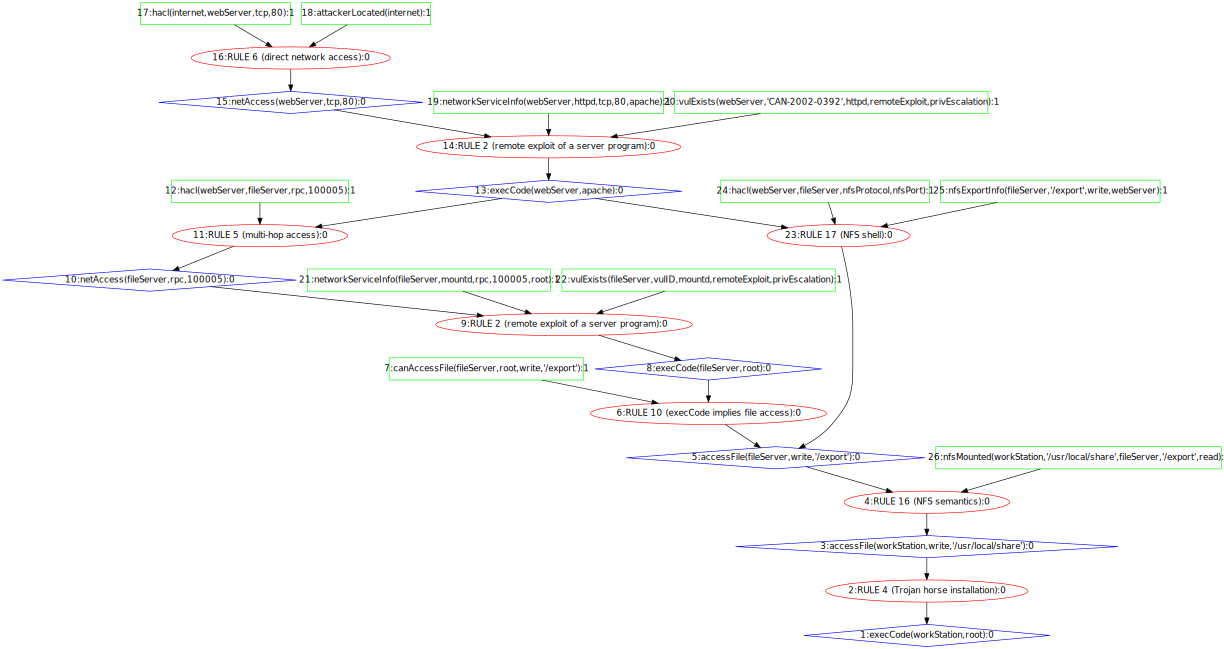

In [2]:
ag = AttackGraph()
ag.load_dot_file('/opt/projects/diss/py-mulval/data/mulval_ag/small_enterprise/AttackGraph.dot')
ag.load_score_dict('/opt/projects/diss/py-mulval/data/scoreDict.yml')
plot_ag(ag)

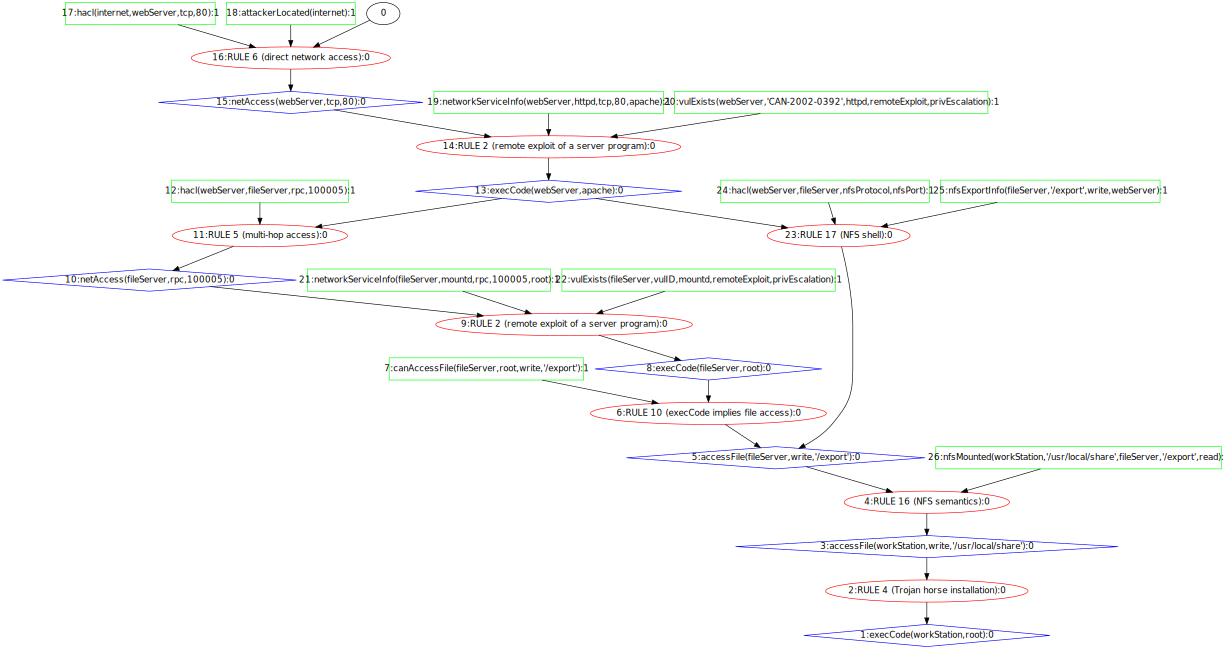

In [3]:
tgraph = ag
tgraph.setOrigin()
plot_ag(tgraph)

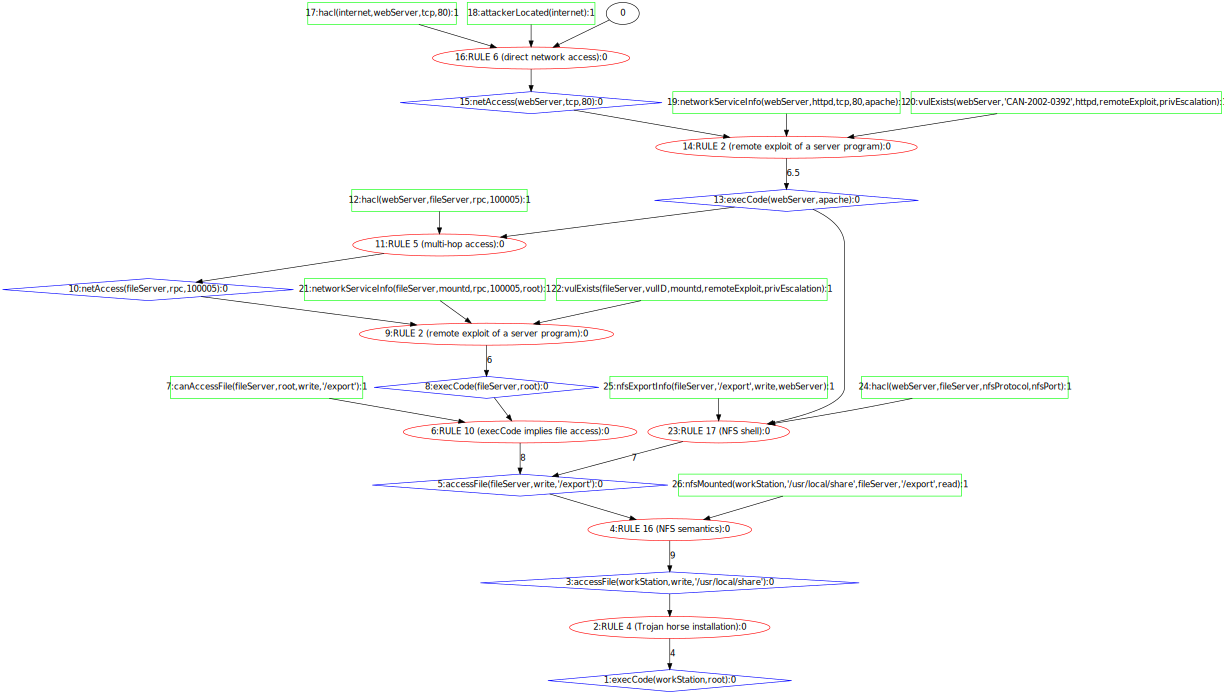

In [4]:

# 1. set AND node exploit score
#    either default value of AND text or CVSS lookup
tgraph.setANDscores()
plot_ag(tgraph)

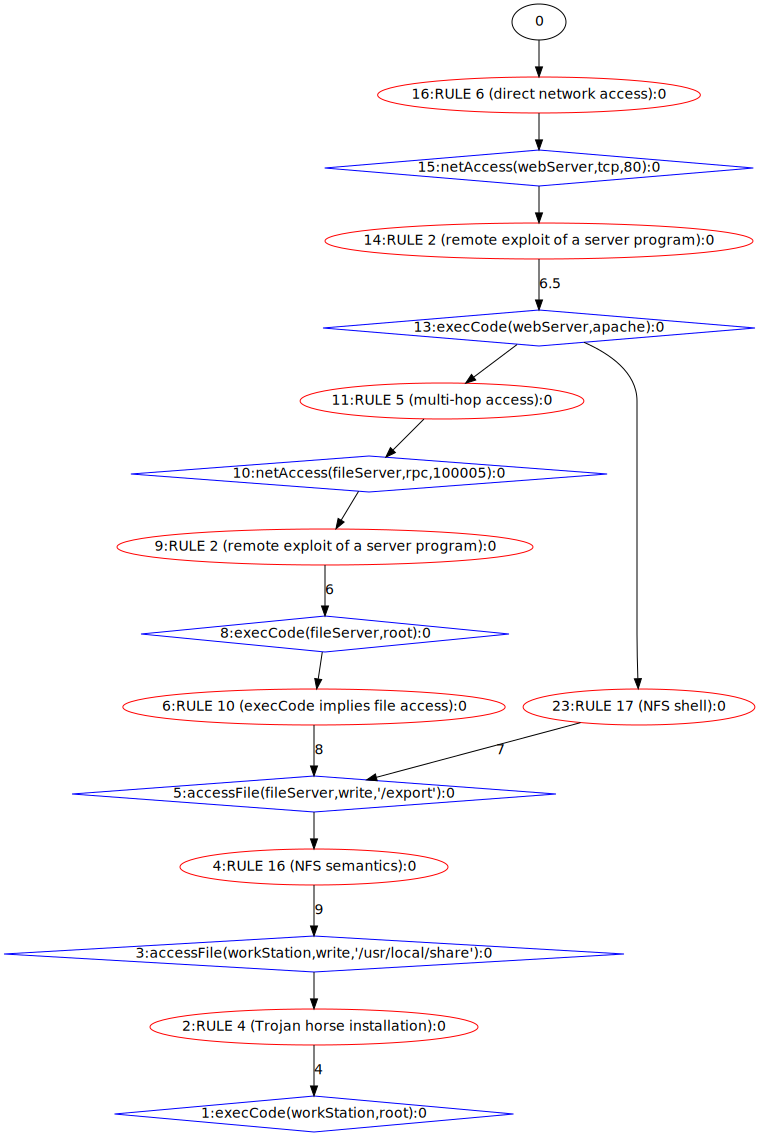

In [5]:

# 2. remove LEAF nodes after scores applied
tgraph.pruneLEAFS()
# logging.debug(('Removing dead nodes: ', list(nx.isolates(tgraph))))
tgraph.remove_nodes_from(list(nx.isolates(tgraph)))
plot_ag(tgraph)

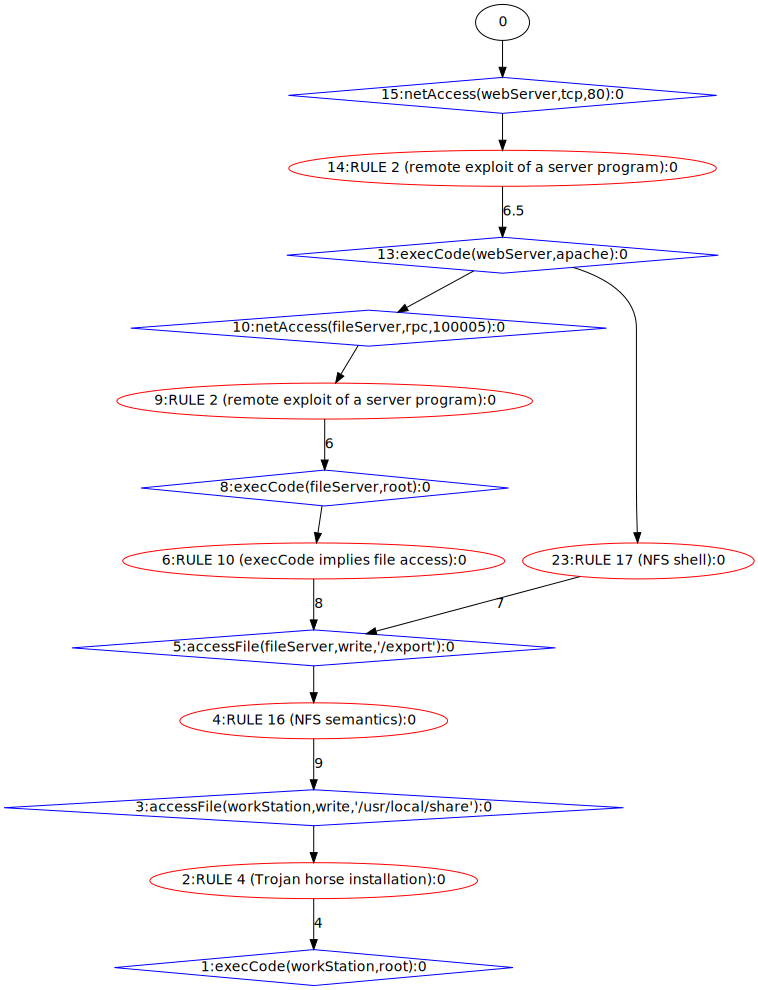

In [6]:

# 3. Join edges passing through this and (multi-hop, no exploit)
tgraph.coalesceANDnodes()
# logging.debug(('Removing dead nodes: ', list(nx.isolates(tgraph))))
tgraph.remove_nodes_from(list(nx.isolates(tgraph)))
plot_ag(tgraph)

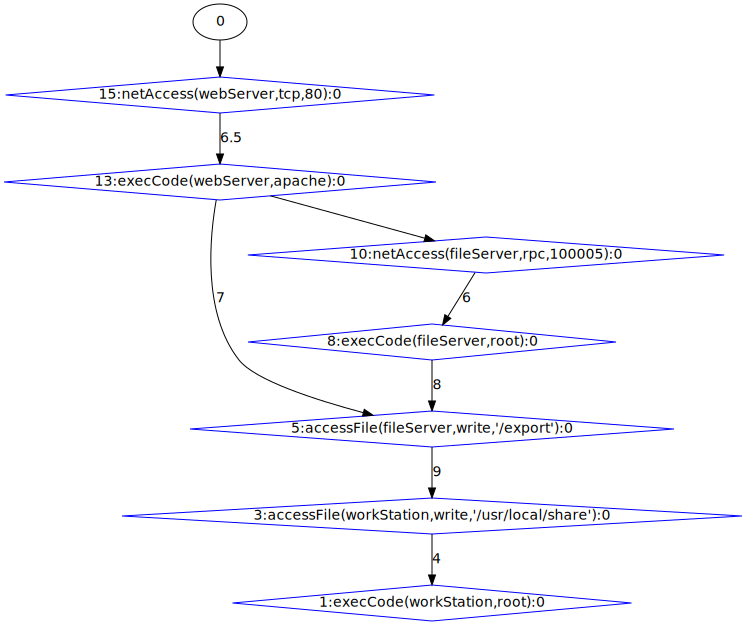

In [7]:

# 4. push AND exploit_score down to child or score dicts
tgraph.scoreANDs()
# logging.debug(('Removing dead nodes: ', list(nx.isolates(tgraph))))
tgraph.remove_nodes_from(list(nx.isolates(tgraph)))
plot_ag(tgraph)

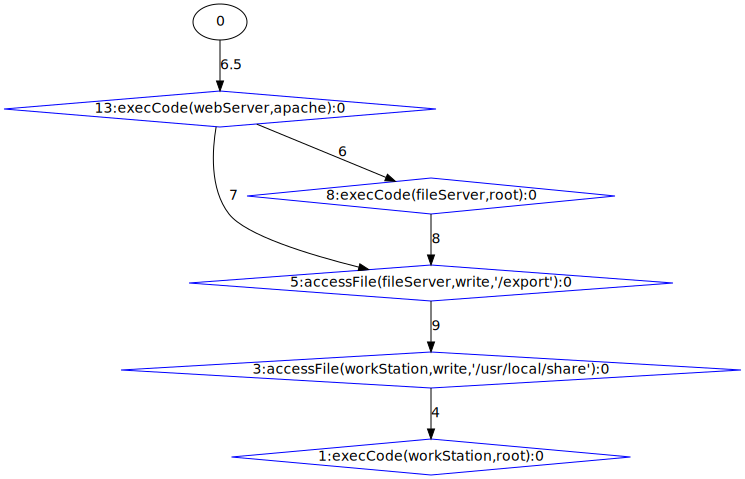

In [8]:

# 5. remove or nodes with empty score dict
tgraph.coalesceORnodes()
# logging.debug(('Removing dead nodes: ', list(nx.isolates(tgraph))))
tgraph.remove_nodes_from(list(nx.isolates(tgraph)))
plot_ag(tgraph)

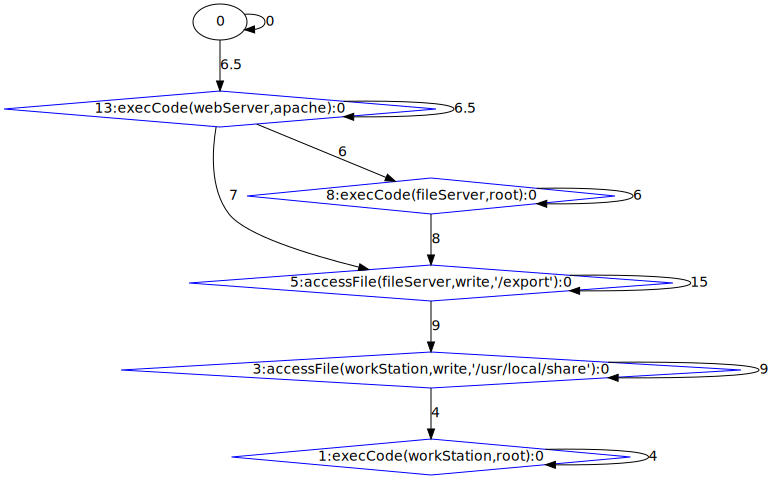

In [9]:

# 6.5 add edge scores
# breaking off to support different weighting strategies
tgraph.setEdgeScores()
plot_ag(tgraph)

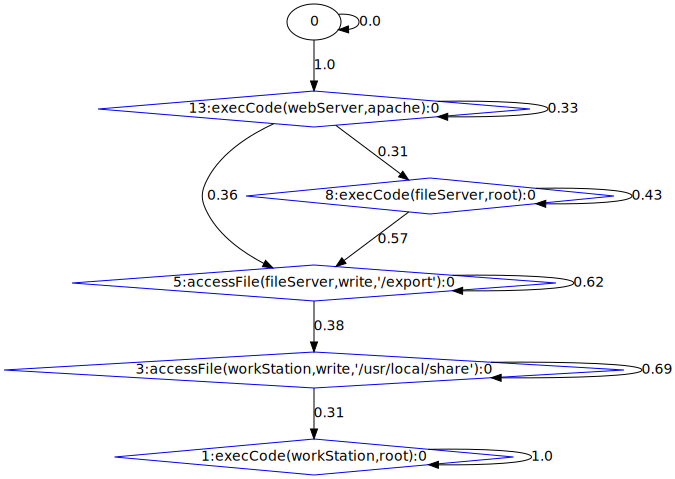

In [10]:

# 7. add edge weights
tgraph.setEdgeWeights()
plot_ag(tgraph)


## Mean Time to Failure (mttf_dacier_1994)
Dacier\cite{Dacier_1994, Dacier_1996}:

privilege graph model assumes the probability to succeed in a given attack before time $t$ is described by an exponential distribution given by: 

$P(t) = 1-exp(-\lambda t) $  

Transition rate $\lambda$ estimates the effort and time, with mean time for an attack to succeed given by 

$\frac{1}{\lambda}$.

$MTTF_k = T_k + \sum\limits_{1\in out(k)}P_{k1} ; P_{k1}=\lambda_{k1} \times T_k$


The shortest path is the 
\textbf{SP}: 
